In [27]:
from PIL import Image, ImageFilter, ImageOps, ImageDraw, ImageStat
from preprocessor import Preprocessor
import numpy as np

img = Image.open(f'./data_preview/raw_img/ISIC_0000004.jpg')
prep_img = Preprocessor(img)

 ## 1. Resize

In [2]:
prep_img.resize()
prep_img.img.size

(512, 512)

## 2. Add border

In [3]:
prep_img.add_border()

## 3. Reduce dimensions, convert to grayscale

In [28]:
prep_img.convert_to_grayscale()
prep_img.img.mode

'L'

## 4. Contrast enchancement

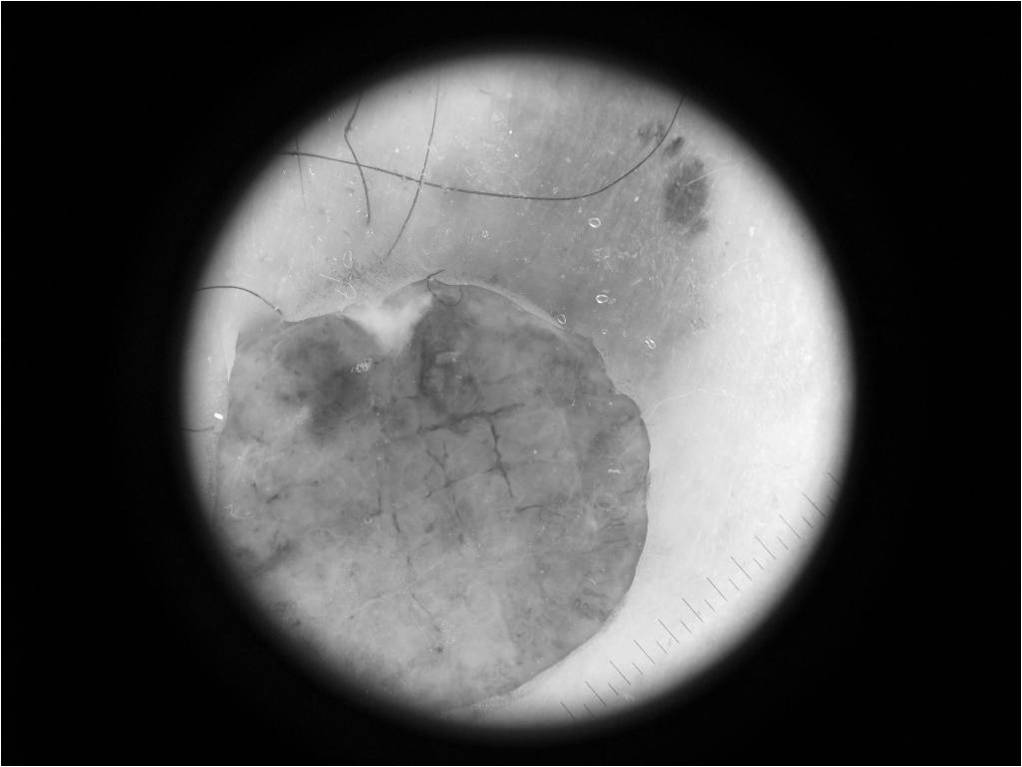

In [29]:
prep_img.enchance_contrast()
prep_img.img

## 5. Hair removal

In [6]:
# im_edges = prep_img.img.filter(ImageFilter.FIND_EDGES)
# blurred = prep_img.img.filter(ImageFilter.GaussianBlur(radius=5))



# prep_img.img.paste(blurred, mask=im_edges)
# prep_img.img

# mask = im_edges.copy()
# #mask = mask.point(lambda x: x > np.average(mask)*5 and 255)
# prep_img.img.paste(im=im_edges, box=(0,0), mask=mask)
# mask


## 6. Vignette effect removal

In [30]:
arr_im = np.array(prep_img.img)
arr_im.shape

(767, 1022)

Iteration: 0
inner: 155.54418001122238 
outer:5.189004467721559
-------


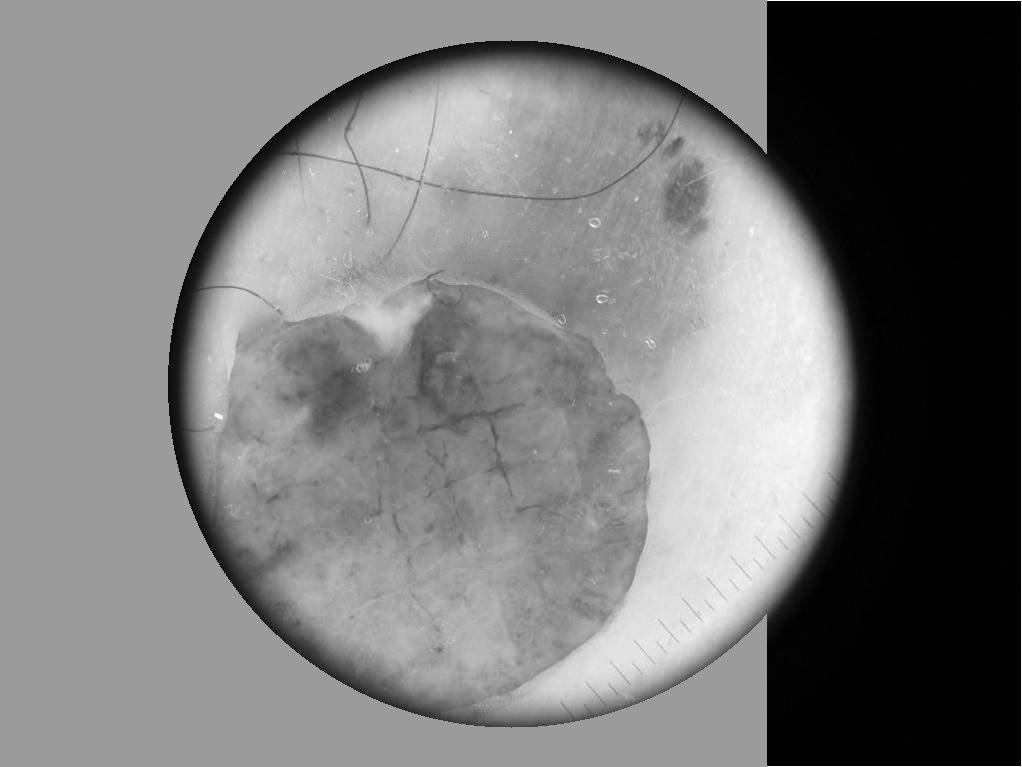

In [31]:
source_image = prep_img.img
#source_image = source_image.crop(box= (20,20, 492, 492) )

height = source_image.size[0]
width = source_image.size[1]
center = (width/2, height/2)

for iteration in range(10):
    print(f"Iteration: {iteration}")
    radius = height / 2 - 40 + iteration * 5

    #Create circular mask
    Y, X = np.ogrid[:height, :width]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    arr_mask = (dist_from_center <= radius)*255
    
    #Apply mask to source image 
    im_mask = Image.fromarray(arr_mask).convert('L')
    masked_img = Image.composite(source_image, im_mask, mask=im_mask)

    #Get mean pixel values of inner and outer circle
    mean_inner = ImageStat.Stat(source_image, mask=im_mask).mean[0]
    mean_outer = ImageStat.Stat(source_image, mask=ImageOps.invert(im_mask)).mean[0]
    print(f'inner: {mean_inner} \nouter:{mean_outer}\n-------')

    #Check if vignette effect is in the image
    if mean_outer < 6.0:
        inner_fill = np.full((width, height), int(mean_inner))
        inner_fill = Image.fromarray(inner_fill).convert('L')

        corrected_img = Image.composite(source_image, inner_fill,mask=im_mask)
        source_image.paste(corrected_img)
        break 


source_image




    

## Overview and save

In [ ]:
prep_img.save("test_no_contrast_ench.png", path='./data_preview/temp/')
prep_img.img